In [22]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [23]:
# Liste der Variablen ausgeben
%whos       

No variables match your requested type.


In [24]:
%matplotlib notebook

# Laden der verwendeten Bibliotheken
from PIL import Image
import   numpy  as np               
import   scipy 
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html
import   sklearn 
import   skimage
from     skimage import data
import   time
from     scipy import signal

In [25]:
# Bild laden mit PIL
img = Image.open("coins.bmp")
#img = Image.open("circle.bmp")
#img = Image.open("boat512.bmp")
#img = Image.open("tasse1.bmp")

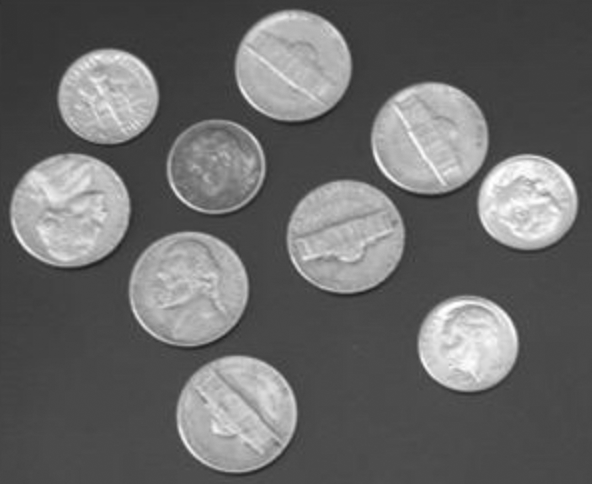

In [26]:
# PIL-Image darstellen
img

In [27]:
# Informationen über PIL-Image
print('format =', img.format)
print('info   =', img.info)
print()
print('size   =', img.size,)
print('mode   =', img.mode)  # 'L' = 8-bit-unsigned

format = BMP
info   = {'dpi': (192, 192), 'compression': 0}

size   = (592, 484)
mode   = L


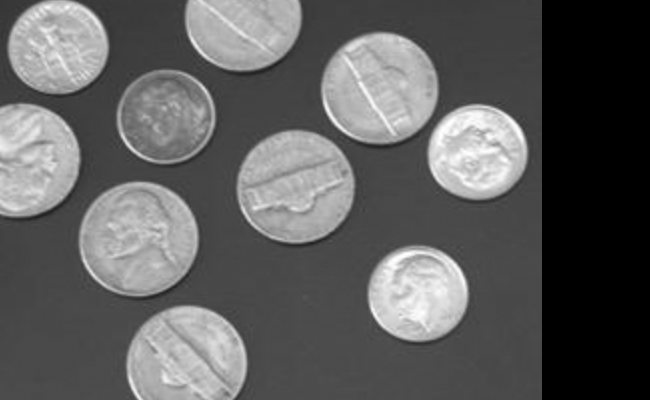

In [28]:
# Beispiel:  Bildausschnitt erzeugen mit PIL-Bild
region = img.crop((50, 50, 700, 450))  # oben links - unten rechts
region

# numpy : Vektoren, Arrays, lineare Algebra und vieles mehr ...
Die aktuelle Dokumentation findet man unter:
https://numpy.org/doc/1.18/

Der Zugriff auf einzelne Bildmatrix-Elemente ist unter numpy günstiger. 
Daher nun der Wechsel von PIL-Images zu numpy-Arrays.

In [29]:
print('Installierte Numpy-Version = ', np.__version__)

Installierte Numpy-Version =  1.18.1


In [30]:
# PIL-Image in ein numpy-Array umwandeln
img2 = np.array(img)
img2

array([[49, 52, 53, ..., 59, 59, 59],
       [50, 51, 52, ..., 58, 58, 58],
       [47, 51, 53, ..., 59, 59, 59],
       ...,
       [72, 72, 72, ..., 73, 72, 73],
       [73, 72, 71, ..., 73, 74, 72],
       [72, 71, 71, ..., 73, 73, 72]], dtype=uint8)

In [31]:
# Informationen über numpy-Array
print('shape =', img2.shape)
print('type  =', img2.dtype)
print('min   =', img2.min())
print('max   =', img2.max())

shape = (484, 592)
type  = uint8
min   = 31
max   = 255


<IPython.core.display.Javascript object>


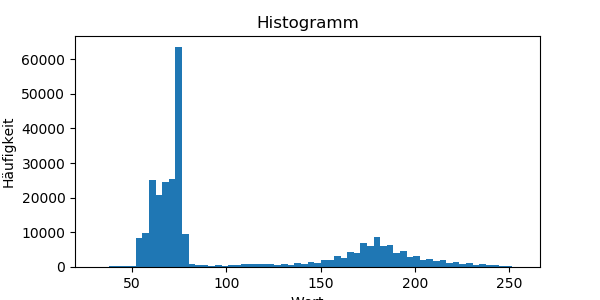

Text(0.5, 1.0, 'Histogramm')

In [32]:
# Histogramm des Bildes anzeigen
plt.figure(figsize = (6,3))

plt.hist(img2.flatten(), bins=64)

plt.xlabel('Wert')
plt.ylabel('Häufigkeit')
plt.title('Histogramm')

In [33]:
# in höheren Datentyp umwandeln  (uint8 --> int), damit Ergebnisse nicht beschnitten werden !

srcpic  = np.copy(img2)      # eine echte Kopie anlegen
srcpic  = srcpic.astype(int) # und in den Datentyp int umwandeln

print('srcpic.dtype     = ', srcpic.dtype)

srcpic.dtype     =  int32


In [34]:
# Selbstgeschriebene Medianfunktion
# ------------------------------------------------------
# Verwendet wird die Faltungsmaske (4-er-Nachbarschaft):
#      -1
#   -1 +5 -1
#      -1
#
# In : int32-Bild
# Out: int32-Bild

def MyOtsu(Quellbild):
    pixel_number = Quellbild.shape[0] * Quellbild.shape[1]
    mean_weigth = 1.0/pixel_number
    his, bins = np.histogram(Quellbild, np.array(range(0, 256)))
    final_thresh = -1
    final_value = -1
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        Wb = np.sum(his[:t]) * mean_weigth
        Wf = np.sum(his[t:]) * mean_weigth

        mub = np.mean(his[:t])
        muf = np.mean(his[t:])

        value = Wb * Wf * (mub - muf) ** 2

     #   print("Wb", Wb, "Wf", Wf)
      #  print("t", t, "value", value)

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = Quellbild.copy()
    print(final_thresh)
    final_img[Quellbild > final_thresh] = 255
    final_img[Quellbild < final_thresh] = 0
    return final_img


In [35]:


#start = time.time()

# Medianoperator aufrufen
mw_img = MyOtsu(srcpic)

#ende   = time.time()
#print('Runtime   = {:5.3f}s'.format(ende-start))



78


<IPython.core.display.Javascript object>


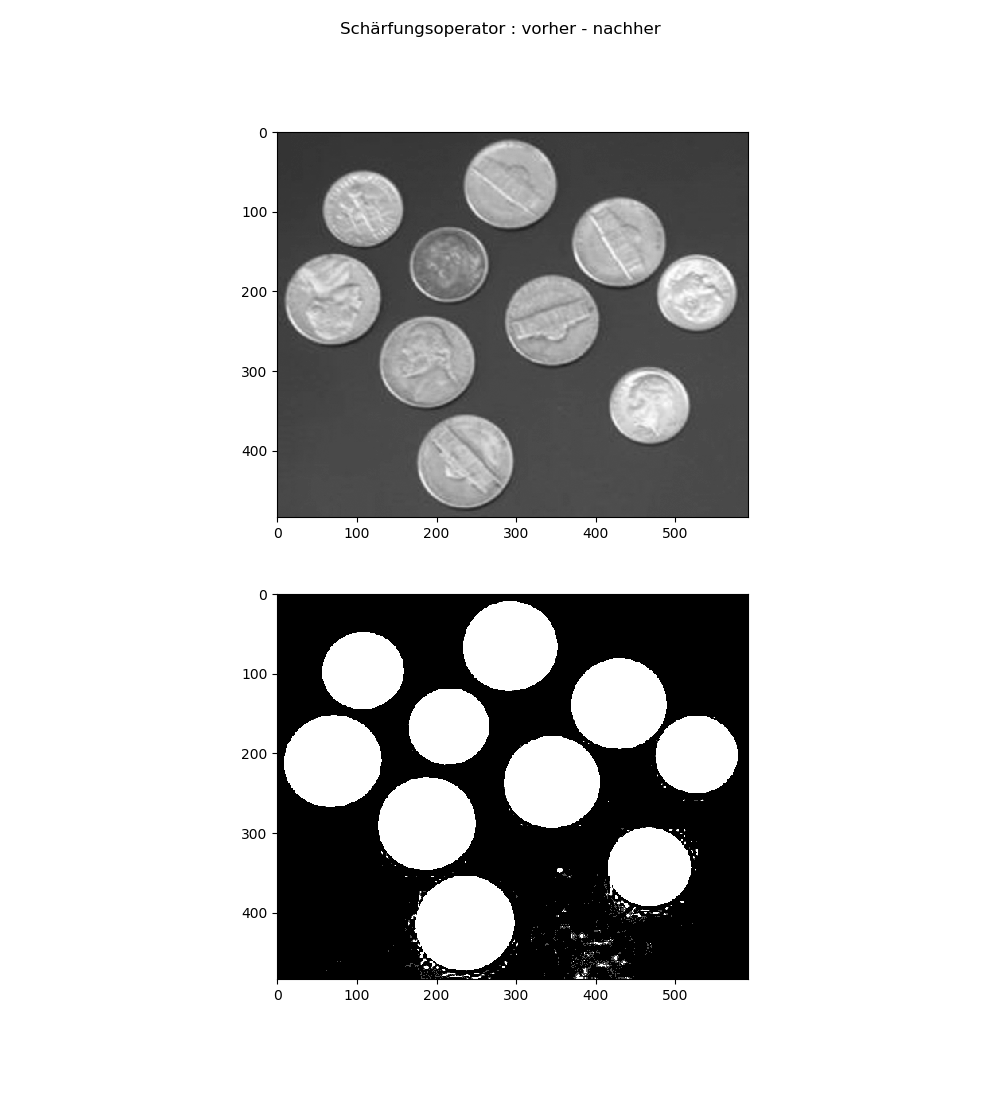

min/max = 0 255
shape   = (484, 592)
dtype   = int32


In [36]:
pic = mw_img;


plt.figure(figsize = (10,11))

plt.subplot(211)
plt.imshow(srcpic, cmap='gray', vmin=0, vmax=255)
plt.subplot(212)
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)
plt.suptitle('Schärfungsoperator : vorher - nachher')
plt.show()

# Informationen zum Bild
print('min/max =', pic.min(), pic.max())
print('shape   =', pic.shape)
print('dtype   =', pic.dtype)

In [17]:
# Zum Vergleich: Laufzeit bei Nutzung der scipy-2d-Faltungsoperation

#mask = np.array([[0, -1, 0],
    #             [-1, 5, -1],
         #        [0, -1, 0]])

#start = time.time()
#shpic = signal.convolve2d(srcpic, mask)
#ende  = time.time()
#print('Runtime   = {:5.3f}s'.format(ende-start))

In [18]:
#pic = shpic;
#plt.figure(figsize = (10,5))
#plt.imshow(pic, cmap='gray', vmin=0, vmax=255)

In [19]:
# Anm.:  ca. 50-70 mal schneller

In [20]:
# Liste der Variablen ausgeben
%whos    

Variable     Type            Data/Info
--------------------------------------
Image        module          <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
MyMedian     function        <function MyMedian at 0x000001BD3B967828>
data         module          <module 'skimage.data' fr<...>mage\\data\\__init__.py'>
img          BmpImageFile    <PIL.BmpImagePlugin.BmpIm<...>770x498 at 0x1BD3A71C888>
img2         ndarray         400x650: 260000 elems, type `uint8`, 260000 bytes (253.90625 kb)
matplotlib   module          <module 'matplotlib' from<...>matplotlib\\__init__.py'>
mw_img       ndarray         400x650: 260000 elems, type `int32`, 1040000 bytes (1015.625 kb)
np           module          <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pic          ndarray         400x650: 260000 elems, type `int32`, 1040000 bytes (1015.625 kb)
plt          module          <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
region       Image           <PIL.Image.Image image mo<...>